## 1. Shannon's theorem in use.

In [21]:
from __future__ import division
import numpy as np
import scipy.fftpack as sf
import matplotlib.pyplot as plt
import pylab as pl

Hereafter, we define a continuous signal that we sample and then we use Shannon's interpolation formula.

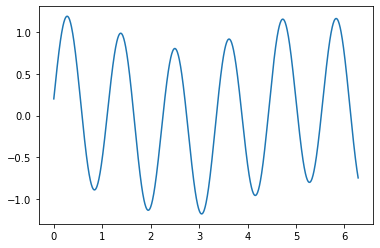

In [22]:
def mySignal(t):
    fq = 0.9
    fq2 = 0.3 * np.pi/5.
    return np.sin(2*np.pi * fq*t) + 0.2*np.cos(2*np.pi * fq2*t)
x = np.linspace(0,2*np.pi,1000)
plt.plot(x,mySignal(x))
plt.show()

### Ex. Choose a sampling time $T_e$, sample this signal and then show the reconstruction using linear interpolation.

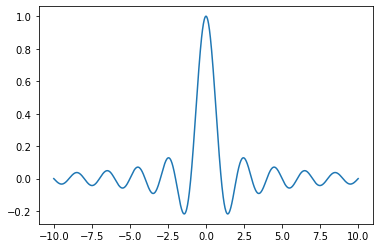

In [23]:
x = np.linspace(-10,10,1000)
y = np.sinc(x)
pl.plot(x,y)
pl.show()


### Ex. Implement Shannon's reconstruction function and implement the associated reconstruction formula. Change the input signal and compare with linear interpolation. What do you observe?


### Let us now observe the aliasing phenomenon by subsampling an image which presents high-frequency information.

(599, 493, 3)


<ipython-input-24-38450d0c585a>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  colored_image = imio.imread('Moire.jpg')


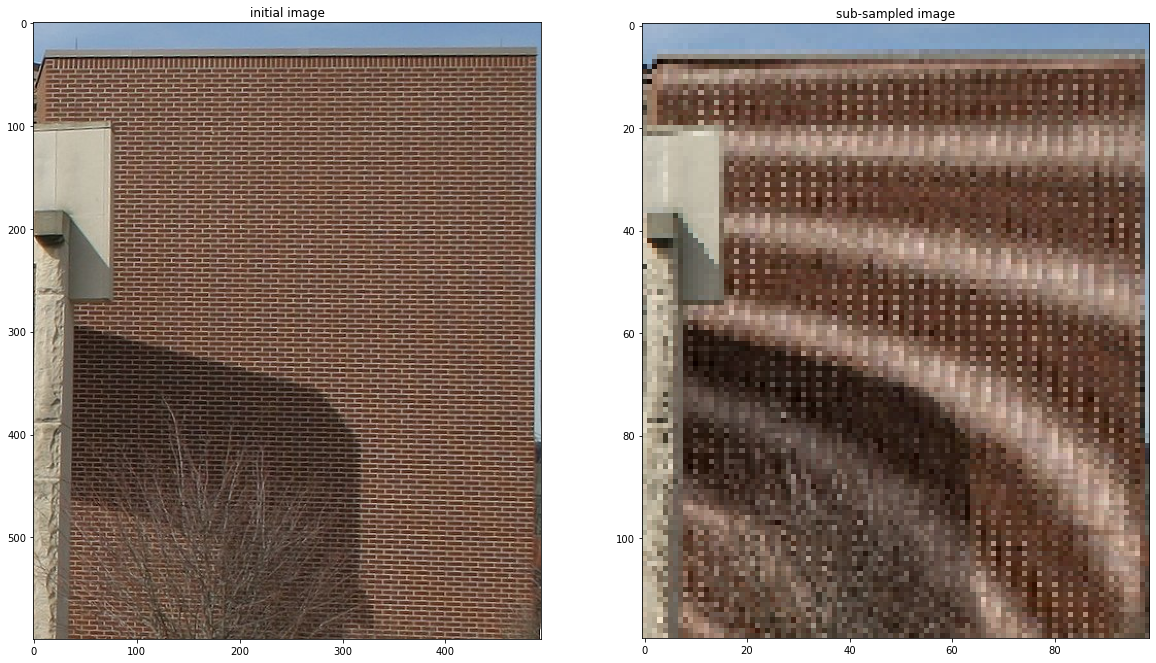

In [24]:
import imageio as imio
colored_image = imio.imread('Moire.jpg')
sub_defense = colored_image[::5,::5,:]
print(np.shape(colored_image))
#plt.gray()
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.title("initial image")
plt.imshow(colored_image)
plt.subplot(1,2,2)
plt.title("sub-sampled image")
plt.imshow(sub_defense)

(597, 491, 3)
(599, 493, 3)
[[[122  90  82]
  [120  88  78]
  [118  86  76]
  [116  85  72]
  [122  89  75]]

 [[102  65  54]
  [ 99  61  50]
  [103  67  54]
  [ 92  59  46]
  [ 96  63  48]]

 [[101  67  54]
  [106  70  58]
  [101  66  53]
  [106  72  58]
  [ 97  64  50]]

 [[  7 106  92]
  [  6 104  90]
  [  4 102  88]
  [ 12 108  96]
  [ 12 110  96]]

 [[  9 112  98]
  [ 21 123 108]
  [ 47  18   4]
  [ 22 119 106]
  [ 26 123 110]]]


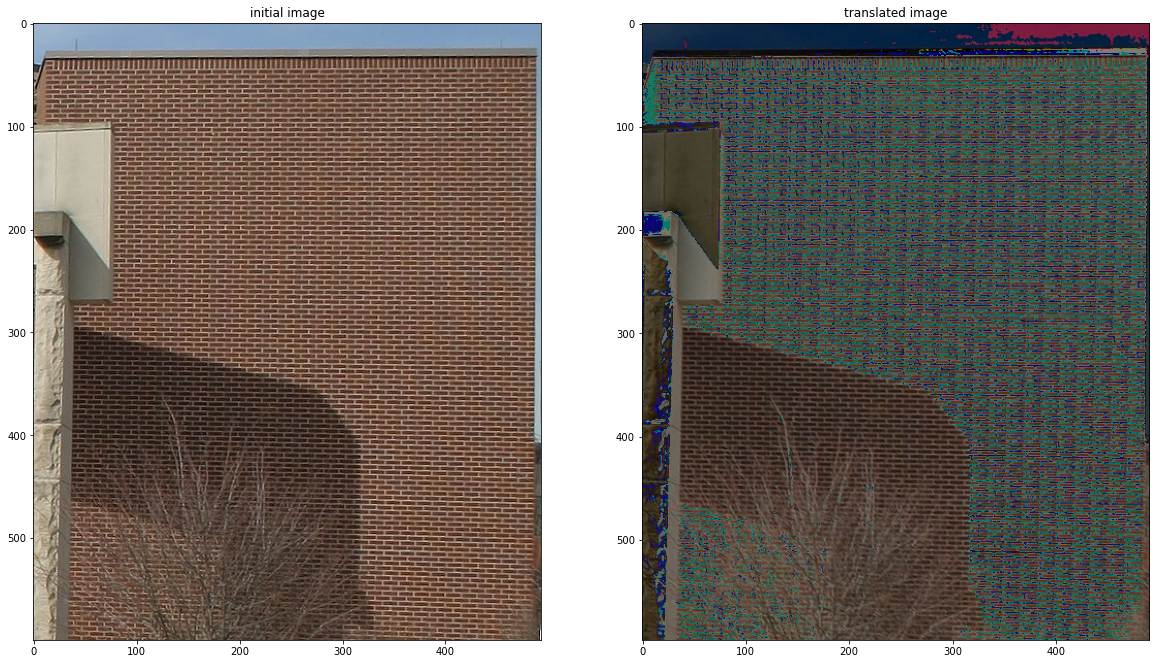

In [25]:
new_image= np.rint((colored_image[1:-1,1:-1,:] + colored_image[0:-2,0:-2,:])*0.5).astype(int)
print(np.shape(new_image))
print(np.shape(colored_image))
print(new_image[125:130,125:130])
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.title("initial image")
plt.imshow(colored_image)
plt.subplot(1,2,2)
plt.title("translated image")
plt.imshow(new_image)

(240, 365)


<ipython-input-26-00cf46613d29>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  colored_image = imio.imread('services_0.jpg')


<Figure size 432x288 with 0 Axes>

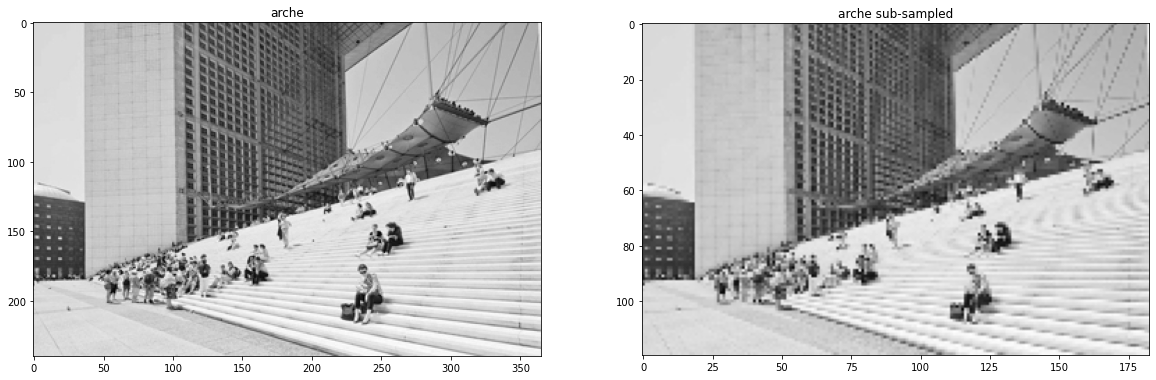

In [26]:
import imageio as imio
colored_image = imio.imread('services_0.jpg')
defense = np.sum(colored_image*[ 0.21, 0.72 ,0.07],axis=-1)
sub_defense = defense[::2,::2]
print(np.shape(defense))
plt.gray()
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.title("arche")
plt.imshow(defense)
plt.subplot(1,2,2)
plt.title("arche sub-sampled")
plt.imshow(sub_defense)


## 2. Simple exercice with the spectrum of a signal.

## A. On a 1D signal.

500


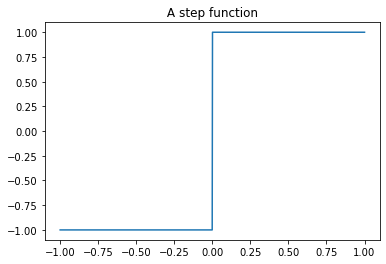

In [27]:
# Choose a grid x and a signal y
n = 1000
m = int(n/2)
print(m)
x = np.linspace(-1,1,n)
y = np.zeros_like(x)
y[m:] = 1
y[0:m] = -1
plt.plot(x,y)
plt.title(" A step function ");

In [28]:
# Use of FFT to compute the discrete Fourier transform
import scipy.fftpack as sf
spectre = sf.fft(y)
inverse_du_spectre = sf.ifft(spectre)

### Ex: Compute the $L^2$ of respectively the signal and its spectrum.
### Ex: Check numerically that the FFT and IFFT are numerical inverse of each others.

500


Text(0.5, 1.0, ' SHIFT IFFT ')

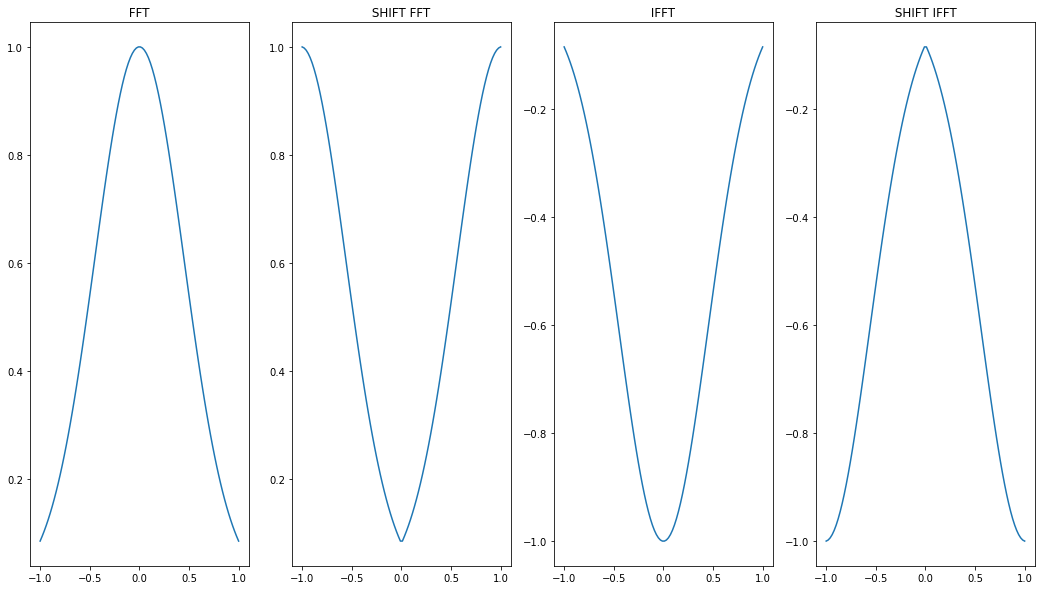

In [29]:
def f(x, sig):
    return np.exp(-(x**2/ (2*(sig**2))) )


n = 1000
m = int(n/2)
print(m)
x = np.linspace(-1,1,100)
y = np.zeros_like(x)
y[m:] = 1
y[0:m] = -1

plt.figure(figsize = (18,10))
plt.subplot(1,4,1)
plt.plot(x,f(x, 0.45))
plt.title(" FFT ")

plt.subplot(1,4,2)
plt.plot(x,sf.fftshift(f(x, 0.45)))
plt.title(" SHIFT FFT ")

plt.subplot(1,4,3)
plt.plot(x,-f(x, 0.45))
plt.title(" IFFT ")

plt.subplot(1,4,4)
plt.plot(x,sf.fftshift(-f(x, 0.45)))
plt.title(" SHIFT IFFT ")

## Important remark:
The FFT output gives the DFT of the input for positive frequencies starting from $0$ on the first half of the vector and the negative frequencies on the second half starting always in increasing order. More precisely, we have that, if $y$ is the output,
$[y(0),y(1),..,y(n/2),y(1-n/2),...,y(-1)] $       if $n$ is even, $[y(0),y(1),..,y((n-1)/2),y(-(n-1)/2),...,y(-1)]$ otherwise.
In general, always use $fftshift$ to put low frequencies in the middle, which is the customary representation of the FFT.

Text(0.5, 1.0, ' The 0 frequency is in the middle. ')

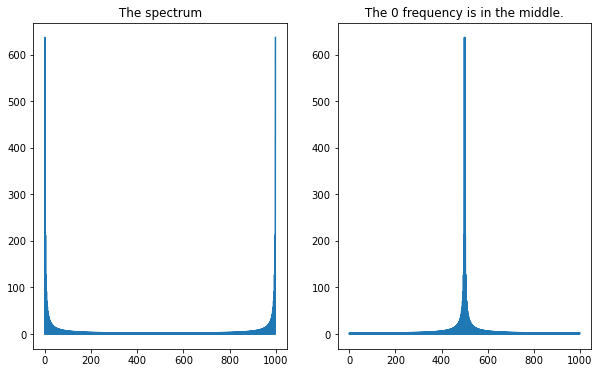

In [30]:
# illustration.
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.plot(np.abs(spectre))
plt.title(" The spectrum ")
plt.subplot(1,2,2)
plt.plot(np.abs(sf.fftshift(spectre)))
plt.title(" The 0 frequency is in the middle. ")

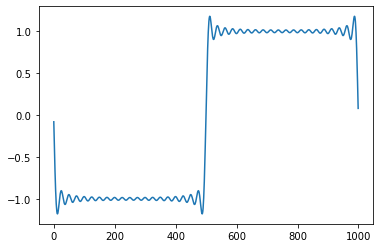

In [31]:
reduced = np.copy(spectre)
h = 40
reduced[h:n-h] = 0
reconstruct=sf.ifft(reduced)
plt.plot(np.real(reconstruct))

### Ex: Read the script above and explain what it does. The illustrated phenomenon is called the Gibbs phenomenon and is due to the slow convergence of the Fourier serie at the discontinuites of the signal.

## Answer. $#####################################$

<ipython-input-32-fc7f478cd875>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.abs(fq)));


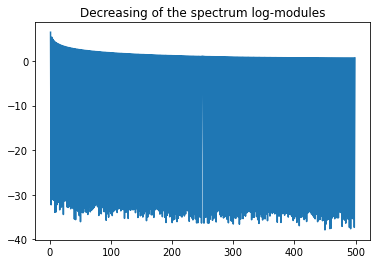

In [32]:
plt.title("Decreasing of the spectrum log-modules")
fq = spectre[0:m]
plt.plot(np.log(np.abs(fq)));

### Ex: What can be observed on the shape of the spectrum ?
### Plot odd and even coefficients. Can you explain why?
### Why did we consider half of the signal?

## Answer. $#####################################$

## B. On an image.

In [33]:
import scipy.signal as sig
from scipy import misc

<ipython-input-34-5bbac78df39e>:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = misc.face(gray=True).astype(np.float32)


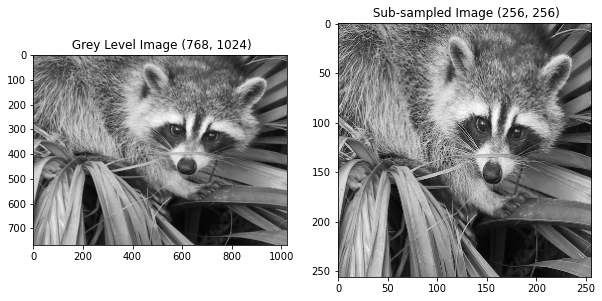

In [34]:
# load an image
image = misc.face(gray=True).astype(np.float32)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.gray()
plt.title(" Grey Level Image " + str(np.shape(image)))
plt.imshow(image)
# sub-sample a matrix
image_sub = image[::3,::4]
plt.subplot(1,2,2)
plt.gray()
plt.title(" Sub-sampled Image " + str(np.shape(image_sub)))
plt.imshow(image_sub)

### Hereafter, we represent the logarithm of the module of the image spectrum.

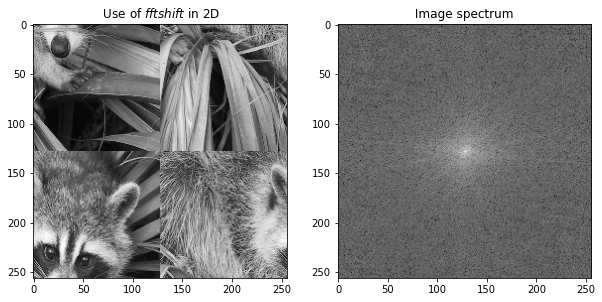

In [35]:
spectre_im = sf.fft2(image_sub)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.gray()
plt.title(" Use of $fftshift$ in 2D ")
plt.imshow(sf.fftshift(image_sub))
plt.subplot(1,2,2)
plt.gray()
plt.title(" Image spectrum ")
plt.imshow(sf.fftshift(np.log(np.abs(spectre_im))))

### Ex: Explain what is the reason of appearance of the white lines in the frequency representation of the image. Propose and implement a solution to get rid of this artifact. We advise to use a mask on the intial image defined using $\sin$ or $\cos$ and then to compute the FFT.


TypeError: Image data of dtype complex64 cannot be converted to float

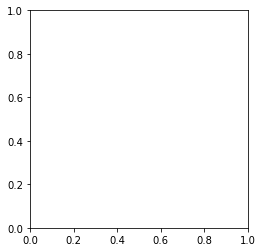

In [36]:
# Explain what is the reason of appearance of the white lines in the frequency representation of the image. 
# L'image n'est pas forcément d'une valeure périodique donc les lignes sont dû aux hautes valeurs de Fourier

spectrum = np.copy(sf.fftshift(np.log(np.abs(spectre_im))))
spectrum[100:150,100:150] = 50
plt.imshow(sf.ifft2(spectrum))


In [ ]:
# Your code here.

## Hereafter, we construct an image from a random modification of the phase of the FFT of an image, which contains what is called texture information, that is repetitive patterns.

In [ ]:
import imageio as imio
bois = imio.imread('wood.jpg')
texture_im = np.sum(bois*[ 0.21, 0.72 ,0.07],axis=-1)
spectre_im = sf.fft2(texture_im)
# construct the random phase. 
plt.figure(figsize = (10,10))
temp = 0.3 * np.random.rand(*np.shape(spectre_im))
random_phase = np.cos(2*np.pi * temp) + np.sin(2*np.pi*temp)*1j
new_spectrum = spectre_im*random_phase
temp_2 = 30 * temp
random_phase_2 = np.cos(2*np.pi * temp_2) + np.sin(2*np.pi*temp_2)*1j
new_spectrum_2 = spectre_im*random_phase_2
plt.subplot(1,3,1)
plt.title(" Initial image ")
plt.imshow(texture_im)
plt.subplot(1,3,2)
plt.title(" with a random phase ")
plt.imshow(np.real(ifft2(new_spectrum)))
plt.subplot(1,3,3)
plt.title(" Larger random phase ")
plt.imshow(np.real(ifft2(new_spectrum_2)))

## Ex: Redo the experiment with the animal image. What do you observe?

## Answer: $##################$.

## 3. Convolution.

111.74402236938477


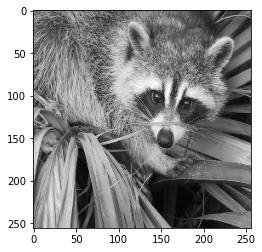

In [69]:
### Construct a gaussian filter.
from scipy.ndimage import gaussian_filter

sigma = 0.2
img = gaussian_filter(image_sub, sigma)
img2 = snr(img, image_sub)
plt.imshow(img)
print(img2)

### Ex: Construct a gaussian filter of size $(256,256)$ and make a convolution of the animal image with this filter. Then, show the image and zoom in a particular region to better see the effect of the convolution when the filter has a small standard deviation.

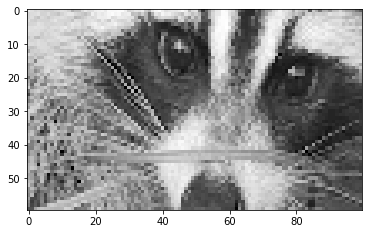

In [77]:
from scipy.ndimage import zoom
img3 = img[90:150, 100:200]
plt.imshow(img3)

## Ex: Suppressing the aliasing effect. 
### Start with the arch image at full resolution, convolve it with a gaussian filter and subsample it as done in the aliasing experiment. Vary the constant of the gaussian filter and try to suppress the aliasing.

23.173155784606934


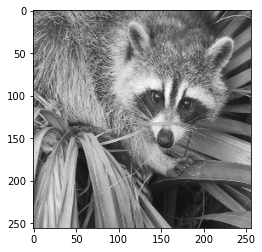

In [85]:
### your code here.
from scipy.signal import decimate
img4 = decimate(image_sub, 1)
plt.imshow(img4)
print(snr(img4, image_sub))

### Answer: $#############$.

## 3. Linear and non-linear approximation. (non linéaire)

In [64]:
### We define two measures to quantify the quality of the signal with respect to the ground truth.
### It is a quantity that is computed between x,y two images. They are called peaked signal to noise ratio,
### and signal to noise ration (psnr and snr).
def psnr(x, y, vmax=-1):
    d = np.mean((x - y) ** 2)
    if d ==0:
        return "Equal inputs"
    if vmax < 0:
        m1 = abs(x).max()
        m2 = abs(y).max()
        vmax = max(m1, m2)
    
    return 10 * np.log10(vmax ** 2 / d)

def snr(x, y):
    s =  np.linalg.norm(x - y)
    if s == 0:
        return "Equal inputs"
    return 20 * np.log10(np.linalg.norm(x) /s)

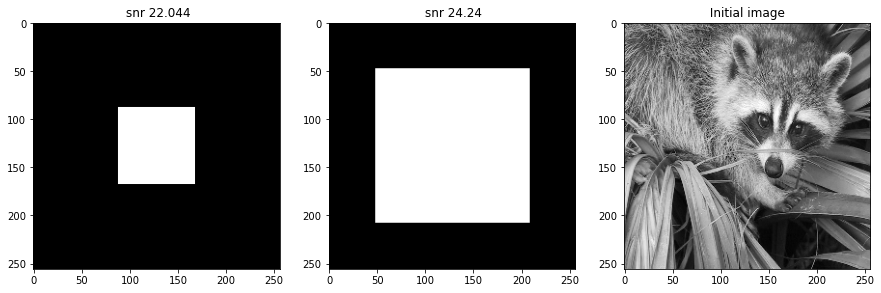

In [70]:
def LinearApproximation(x,n):
    if 2*n>=np.max(np.shape(x)):
        print("n out of bounds")
        return x
    n = np.max(np.shape(x))//2 - n
    spectre = sf.fftshift(sf.fft2(x))
    filtre = np.zeros_like(x)
    filtre[n:-n,n:-n] = 1
    result = np.real(sf.ifft2(sf.fftshift(filtre*spectre)))
    return result,filtre,spectre

approx1,filtre1,spectre = LinearApproximation(image_sub,40)
approx2,filtre2,spectre = LinearApproximation(image_sub,80)
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.title(" snr " + str(round(psnr(image_sub,approx1),3)))
plt.imshow(filtre1)
plt.subplot(1,3,2)
plt.title(" snr " + str(round(psnr(image_sub,approx2),3)))
plt.imshow(filtre2)
plt.subplot(1,3,3)
plt.title(" Initial image ")
plt.imshow(image_sub);

### Ex. Explain what is done in the previous cell.

### Answer:
Plus le carré est petit, plus c'est flou.

### Ex: Redo the experiment but in considering the non-linear approximation of the image by taking the first $M$ larger coefficients in the spectrum. 
### Compare the linear and the non-linear approximation.

In [ ]:
### Your code here.

### Your answer here. $#############$.

## 4. Decompose the image into patches and apply linear-approximation on each patches.
### Compare with the encoding on the whole image.

In [37]:
### Your code here.